In [22]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline

# load data http://www.cad.zju.edu.cn/home/dengcai/Data/FaceData.html
dataset = scipy.io.loadmat('../data/Yale_64x64.mat')

H, W = 64, 64
imgs = dataset['fea']
X = imgs.transpose().astype(np.float64)
X = (X - np.min(X) ) / (np.max(X) - np.min(X))
print( 'the shape of imgs [D x N]:', X.shape )
D = X.shape[0]
N = X.shape[1]
# X: [D x N]

def show_img(vec):
    vec_n = (vec - vec.min() ) / (vec.max() - vec.min())
    plt.imshow( vec_n.reshape([H, W], order='F'))
    plt.axis('off')
    plt.show()
    

the shape of imgs [D x N]: (4096, 165)


## Example 3.3, 3.6: Completing face images with missing pixels

Notations

- $\Omega = \{(i,j) : x_{ij} \text{ is observed } \}$
- $P_\Omega (X)$ is equal to $x_{ij}$ if $(i,j)\in\Omega$ and zero otherwise
- $D_\tau(X) = U S_\tau (\Sigma) V^T$ (singular value thresholding operator)
- $S_\tau(x) = sgn (x) \max( |x| - \epsilon, 0)$ (soft shresholding operator)

### Algorithm 3.2 (solving the matrix completion by proximal gradient)

1. Initialize $Z$ as $0$.
2. repeat
    3. $A \leftarrow \mathcal D_\tau (P_\Omega(Z))$
    4. $Z \leftarrow Z + \beta (P_\Omega (X) - P_\Omega(A))$

In [2]:
def soft_threshold(x, eps):
    return np.sign(x) * np.maximum(np.absolute(x) - eps, 0.)


missing probability:  0.3
iter:  0
iter:  10
iter:  20
iter:  30


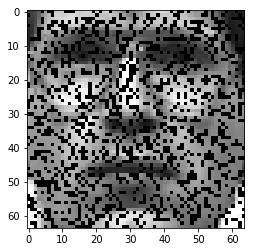

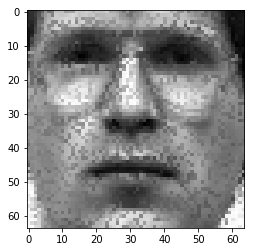

In [13]:
missing_perc = [0.3, 0.5, 0.7, 0.8, 0.9]
for p in missing_perc:
    print('missing probability: ', p)
    
    ## generate missing entries
    Omega = np.ones(D*N, dtype=bool)
    missing = np.random.permutation(D*N)[0:np.int(p*D*N)]
    Omega[missing] = 0
    Omega = Omega.reshape([D, N])
    
    Xi = X * Omega

    ## matrix completion (Algorithm 3.2)
    Z = np.zeros([D, N])
#     Z = Xi.astype(np.float64)
#     Z[Omega == False] = 0.
    tau = 100
    beta = 1
    for iter in range(40):
        ### step1
        [U, S, V] = np.linalg.svd(Z, False)
        Ss = soft_threshold(S, tau)
        A = np.dot(U, np.dot(np.diag(Ss), V) )
        
        ### step2
        Z = Z + beta * (X - A)
        Z[Omega == False] = 0
        
        if (iter % 10) == 0:
            print('iter: ', iter)
    
    A = (A - np.min(A) ) / (np.max(A) - np.min(A))
    show_img(Xi[:,3])
    show_img(A[:,3])
    break
    

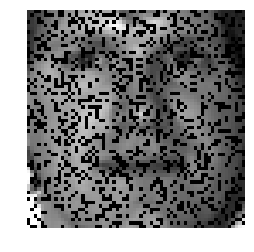

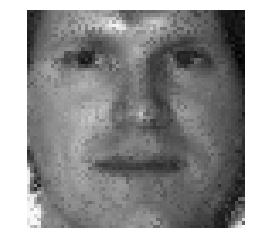

In [21]:
show_img(Xi[:,0])
show_img(A[:,0])